<a href="https://colab.research.google.com/github/mennasaid247/sign-language-classification/blob/main/sign_language_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
#get train and test data (csv files uploaded in google drive)

path_test="/content/drive/MyDrive/csv/sign_mnist_test.csv"
df_test=pd.read_csv(path_test)
path_train="/content/drive/MyDrive/csv/sign_mnist_train.csv"
df_train=pd.read_csv(path_train)
df_test.head()

# df_train.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [142]:
#get train labels
train_labels = df_train['label'].values

In [143]:
#show unique lables
unique_val= np.array(train_labels)
np.unique(unique_val)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<Axes: ylabel='count'>

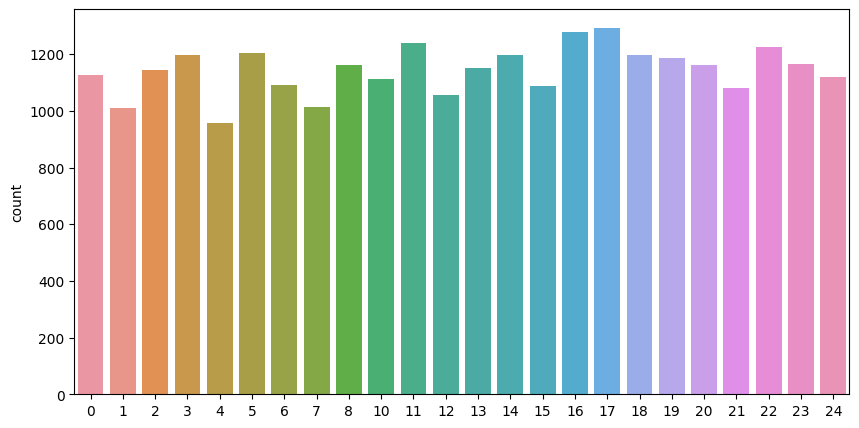

In [144]:
#plot quantites
plt.figure(figsize=(10,5))
sns.countplot(x=train_labels)


In [145]:
#drop labels from train dataset
df_train.drop('label', axis=1,inplace=True)

In [146]:
#extract the image from each row
image=df_train.values
image=np.array([np.reshape(i,(28,28)) for i in image])
image = np.array([i.flatten() for i in image])


In [147]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(train_labels)
print(labels)
# view our label length
len(labels[0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


24

2


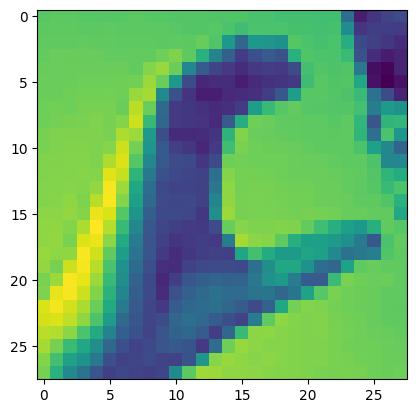

In [148]:
#inspect image
index =2
print(train_labels[index])
plt.imshow(image[index].reshape(28,28))

In [149]:
import cv2
import numpy as np
for i in range(0,10):
    rand= np.random.randint(0,len(image))
    input_im = image[rand]
    sample = input_im.reshape(28,28).astype(np.uint8)
    cv2_imshow(sample)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [150]:
#split data into x_train,x_test,y_train,y_test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(image , labels , test_size = 0.33,random_state = 101)

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [152]:
#scale images
x_train =x_train /255.0
x_test = x_test /255.0

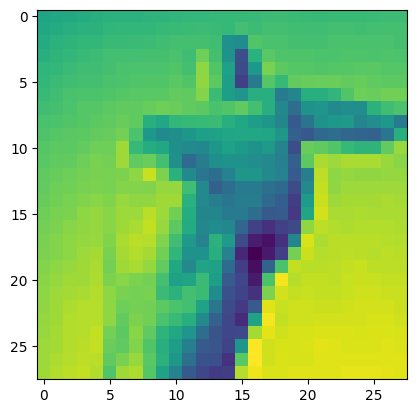

In [153]:
#reshaping the dataset into size reauired by tf and keras
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
plt.imshow(x_train[0].reshape(28,28))

In [154]:
#create cnn model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
model = tf.keras.models.Sequential()
# model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))



In [155]:
# Output layer
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
# model.add(Dense(num_classes, activation='softmax'))

In [156]:
# compling our model
model.compile(loss='categorical_crossentropy'
             ,optimizer = Adam(),
             metrics= [ 'accuracy'])

In [157]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 1, 1, 64)        

In [158]:
#training our model
history = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = epochs ,batch_size = batch_size)

Epoch 1/10
144/144 [==============================] - 38s 254ms/step - loss: 2.7239 - accuracy: 0.1652 - val_loss: 1.8605 - val_accuracy: 0.3812
Epoch 2/10
144/144 [==============================] - 35s 240ms/step - loss: 1.3994 - accuracy: 0.5315 - val_loss: 0.8892 - val_accuracy: 0.7031
Epoch 3/10
144/144 [==============================] - 38s 262ms/step - loss: 0.8193 - accuracy: 0.7190 - val_loss: 0.5898 - val_accuracy: 0.7999
Epoch 4/10
144/144 [==============================] - 38s 264ms/step - loss: 0.5484 - accuracy: 0.8135 - val_loss: 0.3625 - val_accuracy: 0.8830
Epoch 5/10
144/144 [==============================] - 35s 246ms/step - loss: 0.4023 - accuracy: 0.8624 - val_loss: 0.2652 - val_accuracy: 0.9163
Epoch 6/10
144/144 [==============================] - 41s 286ms/step - loss: 0.2777 - accuracy: 0.9076 - val_loss: 0.1722 - val_accuracy: 0.9544
Epoch 7/10
144/144 [==============================] - 38s 266ms/step - loss: 0.2082 - accuracy: 0.9319 - val_loss: 0.1386 - val_ac

In [159]:
#saving the model
model.save('sign_mnist_cnn_50_Epochs')
print('Model Saved')

Model Saved


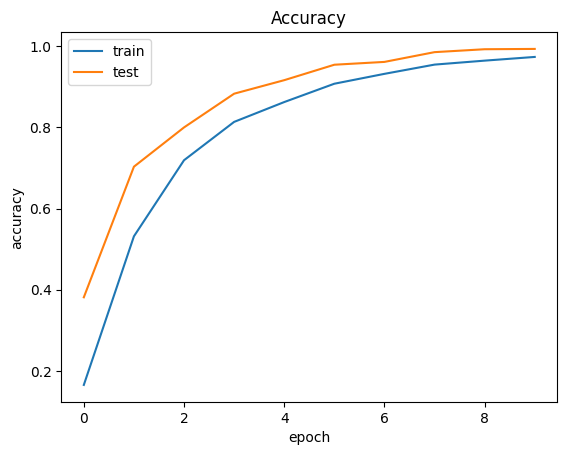

In [160]:
# view our training histroy graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

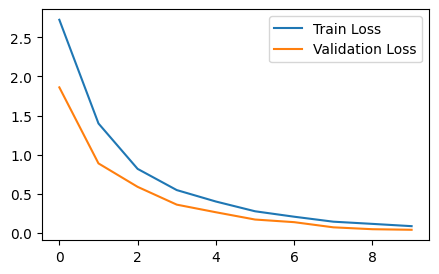

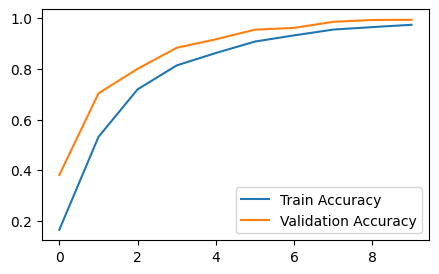

In [161]:
# Plot the loss value
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.figure(figsize=(5,3))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [162]:
# reshaping our test data in order to evaLuate its performance
test_labels= df_test['label']
df_test.drop('label',axis=1,inplace=True)

test_image = df_test.values
test_image = np.array([np.reshape(i,(28,28)) for i in test_image])
test_image=np.array([i.flatten() for i in test_image])

test_labels = label_binarizer.fit_transform(test_labels)
test_image = test_image.reshape(test_image.shape[0],28,28,1)
test_image.shape

(7172, 28, 28, 1)

In [163]:
y_pred = model.predict(test_image)

225/225 [==============================] - 6s 24ms/step


In [164]:
#model evaluation
# getting our accuracy
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,y_pred.round())

0.8107919687674289